In [3]:
import numpy as np 
import keras  
from keras.datasets import mnist 
from keras.models import Model ,Sequential
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 
from scipy import ndimage
import matplotlib.pyplot as plt

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [15]:
print (x_train.shape)

(60000, 28, 28)


In [16]:
new_x_train = np.zeros((60000,40,40))
rotated_train = np.zeros((60000,40,40))
new_x_test = np.zeros((10000,40,40))
rotated_test = np.zeros((10000,40,40))
mixed_train = np.zeros((60000,40,40))

In [17]:
import matplotlib.pyplot as plt
for i in range(len(x_train)):
    original_img = x_train[i]
    rotation_angle = np.random.randint(360)
    rotated_image = ndimage.rotate(original_img, rotation_angle)
    tr = (40-rotated_image.shape[0])//2
    dr = (40-rotated_image.shape[1]) - tr
    lc = (40-rotated_image.shape[0])//2
    rc = (40-rotated_image.shape[1]) - lc

    new_x_train[i] = np.pad(original_img, ( (6,6),(6,6) ) ,mode='constant',constant_values=0)
    rotated_train[i] = np.pad(rotated_image, ( (tr,dr),(lc,rc) ) ,mode='constant',constant_values=0)
    
    # plt.imshow(original_img)
    # plt.imshow(rotated_image)
for i in range(len(x_test)):
    rotation_angle = np.random.randint(360)
    rotated_image = ndimage.rotate(x_test[i], rotation_angle)
    tr = (40-rotated_image.shape[0])//2
    dr = (40-rotated_image.shape[1]) - tr
    lc = (40-rotated_image.shape[0])//2
    rc = (40-rotated_image.shape[1]) - lc
    
    rotated_test[i]=np.pad(rotated_image, ( (tr,dr),(lc,rc) ) ,mode='constant',constant_values=0)
    
    new_x_test[i]=np.pad(x_test[i], ( (6,6),(6,6) ) ,mode='constant',constant_values=0)


(40, 40, 1)


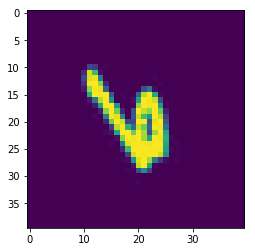

In [33]:
print(rotated_test[20].shape)
test = rotated_test[20]
test = test.reshape(40,40)
plt.imshow(test)

In [18]:
img_rows, img_cols=40, 40
if k.image_data_format() == 'channels_first': 
    new_x_train = new_x_train.reshape(new_x_train.shape[0], 1, img_rows, img_cols)
    rotated_train = rotated_train.reshape(rotated_train.shape[0], 1, img_rows, img_cols)
    new_x_test = new_x_test.reshape(new_x_test.shape[0], 1, img_rows, img_cols) 
    inpx = (1, img_rows, img_cols) 
else: 
    new_x_train = new_x_train.reshape(new_x_train.shape[0], img_rows, img_cols, 1) 
    rotated_train = rotated_train.reshape(rotated_train.shape[0], img_rows, img_cols, 1)
    new_x_test = new_x_test.reshape(new_x_test.shape[0], img_rows, img_cols, 1) 
    rotated_test = rotated_test.reshape(rotated_test.shape[0], img_rows, img_cols, 1) 
    inpx = (img_rows, img_cols, 1) 

y_train = keras.utils.to_categorical(y_train,10)    #One Hot Encode
y_test = keras.utils.to_categorical(y_test,10)      #One Hot Encode


x_train = x_train.astype('float32') 
rotated_train = rotated_train.astype('float32') 
new_x_train = new_x_train.astype('float32') 
x_test = x_test.astype('float32') 
new_x_test = new_x_test.astype('float32') 
rotated_test = rotated_test.astype('float32') 


x_train /= 255
new_x_train /= 255
rotated_train /= 255
x_test /= 255
new_x_test /= 255
rotated_test /= 255

inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
layer4 = Dropout(0.5)(layer3) 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6) 
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy']) 
  
# model.fit(new_x_train, y_train, epochs=2, batch_size=128) 

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
# # print (x_test.shape)
# score = model.evaluate(rotated_test, y_test, verbose=0) 
# print('loss=', score[0]) 
# print('accuracy=', score[1]) 

In [9]:
scores=[]
k=0;
while k<=100:
    for i in range(len(x_train)):
        percent = len(x_train)*k//100
        if i<percent:
            new_x_train[i] = rotated_train[i]
        else:
            break
#             new_x_train[i] = new_x_train[i]
    model.fit(new_x_train, y_train, epochs=3, batch_size=128)
    score = model.evaluate(rotated_test, y_test, verbose=0)
    scores.append(score)
    print('Rotated data percentage', k)
    print('loss=', score[0]) 
    print('accuracy=', score[1]) 
    k+=10

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 177s 3ms/step - loss: 0.3165 - acc: 0.9036
Epoch 2/3
60000/60000 [==============================] - 210s 4ms/step - loss: 0.0891 - acc: 0.9733
Epoch 3/3
60000/60000 [==============================] - 206s 3ms/step - loss: 0.0641 - acc: 0.9807
Rotated data percentage 0
loss= 3.7318526138305663
accuracy= 0.3612
Epoch 1/3
60000/60000 [==============================] - 203s 3ms/step - loss: 0.2179 - acc: 0.9379
Epoch 2/3
60000/60000 [==============================] - 204s 3ms/step - loss: 0.1417 - acc: 0.9561
Epoch 3/3
60000/60000 [==============================] - 209s 3ms/step - loss: 0.1108 - acc: 0.9666
Rotated data percentage 10
loss= 0.5467910362958908
accuracy= 0.8275
Epoch 1/3
60000/60000 [==============================] - 219s 4ms/step - loss: 0.1448 - acc: 0.9565
Epoch 2/3
60000/60000 [==============================] - 241s 4ms/step - loss: 0.1171 - acc: 0.9648
Epoch 3/3
60000

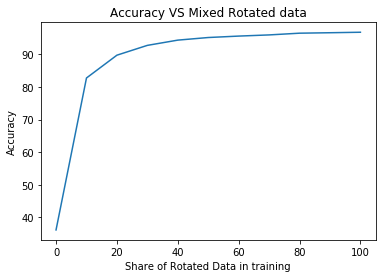

In [16]:
scores = [(3.7318526138305663,36.12),(0.5467910362958908,82.75),(0.33211031255126,89.75),(0.23140600017607213,92.76),(0.1824785115376115,94.37),(0.1563132534109056,95.17),(0.14079290256612004,95.61),(0.1285845530539751,95.97),(0.11929636264964938,96.5),(0.11176297247093171,96.64),(0.10753180085103958,96.79)]
# plt.plot([scores[i][1] for i in range(11)],[i*10 for i in range(11)])
# plt.plot([scores[i][0] for i in range(11)],[i*10 for i in range(11)])
plt.plot([i*10 for i in range(11)],[scores[i][1] for i in range(11)])
plt.ylabel("Accuracy")
plt.xlabel("Share of Rotated Data in training")
plt.title("Accuracy VS Mixed Rotated data")
plt.show()

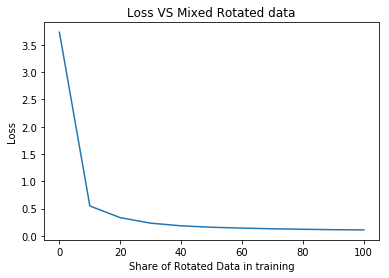

In [15]:
# plt.plot([scores[i][1] for i in range(11)],[i*10 for i in range(11)])
plt.plot([i*10 for i in range(11)],[scores[i][0] for i in range(11)])

plt.ylabel("Loss")
plt.xlabel("Share of Rotated Data in training")
plt.title("Loss VS Mixed Rotated data")
plt.show()